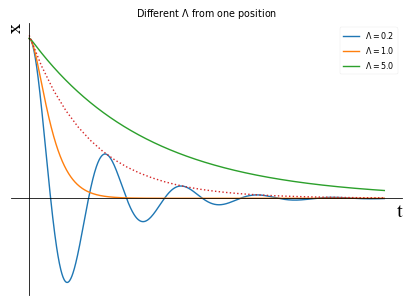

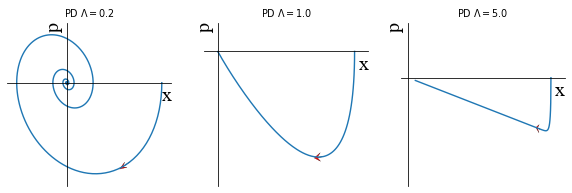

In [1]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as psl
psl.use('seaborn-paper')

b_vec = np.array([0.2, 1.0, 5.0])
w0_vec = np.array([1. for i in range(len(b_vec))])
def deri(xvec, time, b, w0):
    dx = xvec[1]
    d2x = -2*b*xvec[1]-w0**2*xvec[0]
    return dx, d2x

xinit = (1, 0)
time_vec = np.linspace(0, 30, 1000)

##### Solution and Plot
fig0, ax0 = plt.subplots(figsize=(7, 5))
fig1, ax1 = plt.subplots(1, 3, figsize=(10, 3))
ax0.spines['right'].set_color('none')
ax0.spines['top'].set_color('none')
ax0.spines['left'].set_position(('data', 0))
ax0.spines['bottom'].set_position(('data', 0))
for i in range(3):
    ax1[i].spines['right'].set_color('none')
    ax1[i].spines['top'].set_color('none')
    ax1[i].spines['left'].set_position(('data', 0))
    ax1[i].spines['bottom'].set_position(('data', 0))

wid_vec = np.array([0.05, 0.03, 0.015])
font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 20,}   

for i in range(3):
    xarr = odeint(deri, xinit, time_vec, args=(b_vec[i], w0_vec[i]))
    ax0.plot(time_vec, xarr[:,0], label=r'$\Lambda='+str(b_vec[i])+'$')

    xarr = odeint(deri, xinit, time_vec, args=(b_vec[i], w0_vec[i]))
    ax1[i].plot(xarr[:,0],xarr[:,1])
    ax1[i].set_title(r'PD $\Lambda='+str(b_vec[i])+'$')
    ax1[i].arrow(xarr[30, 0], xarr[30, 1], xarr[32, 0]-xarr[30, 0], xarr[32, 1]-xarr[30, 1], fc='r', overhang=0.5, head_width = wid_vec[i])
    ax1[i].set_xlim(np.min(xarr[:,0])-0.1, np.max(xarr[:,0])+0.1)
    ax1[i].set_ylim(np.min(xarr[:,1])-0.1, np.max(xarr[:,1])+0.1)
    ax1[i].set_xlabel('x', font2, horizontalalignment='right', position=(1, -0.2))
    ax1[i].set_ylabel('p', font2, horizontalalignment='right', position=(-0.2, 1))
    ax1[i].set_yticks([])
    ax1[i].set_xticks([])

t1 = np.linspace(0, 30, 30)
ax0.plot(t1, np.exp(-b_vec[0]*t1)*(1+(b_vec[0]/w0_vec[0])**2)**0.5,':')
ax0.set_yticks([])
ax0.set_xticks([])
ax0.set_xlabel('t', font2, horizontalalignment='right', position=(1, -0.2))
ax0.set_ylabel('x', font2, horizontalalignment='right', position=(-0.2, 1))
ax0.legend()

ax0.set_title(r'Different $\Lambda$ from one position')
plt.show()